# Notebook #1: EDA

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_preprocesamiento as sp

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

- Como primer paso, cargaremos los tres DFs con los datos:

In [2]:
df_employee_survey = pd.read_csv("../../datos/origen/employee_survey_data.csv")
df_manager_survey = pd.read_csv("../../datos/origen/manager_survey_data.csv")
df_general = pd.read_csv("../../datos/origen/general_data.csv")

In [3]:
df_employee_survey.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [4]:
df_manager_survey.head(2)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [5]:
df_general.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4


- Comprobamos que todos contienen la misma cantidad de empleados (valores únicos)

In [6]:
df_general["EmployeeID"].nunique()

4410

In [7]:
df_employee_survey["EmployeeID"].nunique()

4410

In [8]:
df_manager_survey["EmployeeID"].nunique()

4410

- Dado que todos contienen la misma cantidad, procedemos una unirlos con un merge.

In [9]:
df = pd.merge(df_general, df_employee_survey, how="inner")
df = pd.merge(df, df_manager_survey, how="inner")

In [10]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3


- Respecto a las columnas, si lo que se desea predecir es la probabilidad de que un empleado abandone o no la empresa, parece que todas podrían guardar relación con esta predicción. De momento, las mantendremos todas, excepto aquellas en hay una única categoría. Esas columas son "Over18", "EmployeeCount" y "StandardHours".

- Por su parte, los "EmployeeID" los eliminaremos también, dado que corresponden a identificadores únicos, con lo cual, harían demasiado específicas las predicciones.

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [12]:
df["Over18"].nunique()

1

In [13]:
df["EmployeeCount"].nunique()

1

In [14]:
df["StandardHours"].nunique()

1

In [15]:
df.drop(columns = ["Over18", "EmployeeCount", "StandardHours", "EmployeeID"], inplace=True)

- Eliminamos los duplicados surgidos de eliminar la columna "EmployeeID".

In [16]:
df.drop_duplicates(inplace=True)

- Y hacemos una exploración inicial de los datos.

In [17]:
sp.exploracion_dataframe(df, "Attrition")

El número de datos es 1573 y el de columnas es 25

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
NumCompaniesWorked,1.207883
TotalWorkingYears,0.572155
EnvironmentSatisfaction,1.462174
JobSatisfaction,1.144310
WorkLifeBalance,2.225048



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
Gender,object
JobLevel,int64
JobRole,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ATTRITION tiene las siguientes valore únicos:


,count
Attrition,
No,1321
Yes,252


La columna BUSINESSTRAVEL tiene las siguientes valore únicos:


,count
BusinessTravel,
Travel_Rarely,1117
Travel_Frequently,297
Non-Travel,159


La columna DEPARTMENT tiene las siguientes valore únicos:


,count
Department,
Research & Development,1030
Sales,477
Human Resources,66


La columna EDUCATIONFIELD tiene las siguientes valore únicos:


,count
EducationField,
Life Sciences,655
Medical,489
Marketing,167
Technical Degree,144
Other,90


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Male,953
Female,620


La columna JOBROLE tiene las siguientes valore únicos:


,count
JobRole,
Sales Executive,348
Research Scientist,308
Laboratory Technician,278
Manufacturing Director,157
Healthcare Representative,145


La columna MARITALSTATUS tiene las siguientes valore únicos:


,count
MaritalStatus,
Married,720
Single,496
Divorced,357



 ..................... 

Los principales estadísticos de las columnas categóricas para el NO son: 


,count,unique,top,freq
Attrition,1321,1,No,1321
BusinessTravel,1321,3,Travel_Rarely,954
Department,1321,3,Research & Development,870
EducationField,1321,6,Life Sciences,547
Gender,1321,2,Male,796
JobRole,1321,9,Sales Executive,290
MaritalStatus,1321,3,Married,635



 ..................... 

Los principales estadísticos de las columnas numéricas para el NO son: 


,count,mean,std,min,25%,50%,75%,max
Age,1321.0,37.575322,8.858601,18.0,31.0,36.0,43.0,60.0
DistanceFromHome,1321.0,9.202877,8.195510,1.0,2.0,7.0,14.0,29.0
Education,1321.0,2.918244,1.025128,1.0,2.0,3.0,4.0,5.0
JobLevel,1321.0,2.056018,1.113231,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1321.0,65631.105223,47584.136978,10510.0,29290.0,48980.0,85780.0,199990.0
NumCompaniesWorked,1306.0,2.663093,2.477139,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1321.0,15.155185,3.631010,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1321.0,0.791067,0.845816,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1314.0,11.835616,7.742352,0.0,6.0,10.0,16.0,38.0
TrainingTimesLastYear,1321.0,2.840273,1.311747,0.0,2.0,3.0,3.0,6.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el YES son: 


,count,unique,top,freq
Attrition,252,1,Yes,252
BusinessTravel,252,3,Travel_Rarely,163
Department,252,3,Research & Development,160
EducationField,252,6,Life Sciences,108
Gender,252,2,Male,157
JobRole,252,9,Sales Executive,58
MaritalStatus,252,3,Single,130



 ..................... 

Los principales estadísticos de las columnas numéricas para el YES son: 


,count,mean,std,min,25%,50%,75%,max
Age,252.0,33.384921,9.581619,18.0,27.00,31.0,39.00,58.0
DistanceFromHome,252.0,8.924603,7.752539,1.0,2.00,7.0,14.00,29.0
Education,252.0,2.876984,1.012249,1.0,2.00,3.0,4.00,5.0
JobLevel,252.0,2.059524,1.082470,1.0,1.00,2.0,2.00,5.0
MonthlyIncome,252.0,61563.492063,44553.958116,10090.0,28420.00,49220.0,71130.00,198590.0
NumCompaniesWorked,248.0,2.919355,2.662065,0.0,1.00,1.0,5.00,9.0
PercentSalaryHike,252.0,15.448413,3.723688,11.0,12.75,14.0,18.00,25.0
StockOptionLevel,252.0,0.785714,0.866436,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,250.0,8.144000,7.022287,0.0,3.00,7.0,10.00,40.0
TrainingTimesLastYear,252.0,2.634921,1.136873,0.0,2.00,3.0,3.00,6.0


- Para nuestro conjunto podemos ver que, tenemos 2837 datos duplicados.

- Además, tenemos un bajo porcentaje de nulos en 5 columnas.

In [18]:
porc_nulos = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
porc_nulos

np.float64(0.2644628099173554)

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    23
JobSatisfaction            18
WorkLifeBalance            35
JobInvolvement              0
PerformanceRating           0
dtype: int64

- Rellenaremos los nulos categóricos con una nueva categoría "Sin información". Por su parte, los nulos de la numérica "NumCompaniesWorked", los rellenaremos con la mediana, que es 2.

In [20]:
df["NumCompaniesWorked"].astype(float).describe()

count    1554.000000
mean        2.703990
std         2.508432
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [21]:
df["NumCompaniesWorked"] = df["NumCompaniesWorked"].fillna(2)

In [22]:
df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']] = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].fillna("Sin información")

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1573.0,36.904005,9.105911,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1573.0,9.158296,8.124414,1.0,2.0,7.0,14.0,29.0
Education,1573.0,2.911634,1.022867,1.0,2.0,3.0,4.0,5.0
JobLevel,1573.0,2.056580,1.108022,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1573.0,64979.459631,47121.739301,10090.0,28990.0,49000.0,83800.0,199990.0
NumCompaniesWorked,1573.0,2.695486,2.494413,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1573.0,15.202161,3.646403,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1573.0,0.790210,0.848876,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1564.0,11.245524,7.748763,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1573.0,2.807374,1.287203,0.0,2.0,3.0,3.0,6.0


- Eliminamos los valores nulos.

In [24]:
df.dropna(inplace=True)

- En lo que respecta a la variable respuesta u objetivo, sabemos que es "Attrition", con valores binarios de "Yes" y "No", y hace referencia a cuando un empleado se ha marchado o no de la empresa. Como observación adicional, vemos que hay un desbalanceo importante, siendo los Yes sólamente un 16%, lo cual tiene sentido.

In [25]:
df_num, df_cat = sp.separar_dataframe(df)

In [26]:
df_num

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3,3
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,2,4
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,3,3
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,2,3
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,45,1,2,1,70830,2.0,12,1,25.0,5,1,0,0,3,3
4226,36,2,3,2,43200,2.0,17,0,5.0,2,1,0,0,3,3
4305,45,1,4,1,25800,8.0,17,3,20.0,3,17,0,15,3,3
4332,31,2,5,2,27280,8.0,11,0,7.0,3,4,0,2,4,3


- Realizaremos un análisis de las variables numéricas:

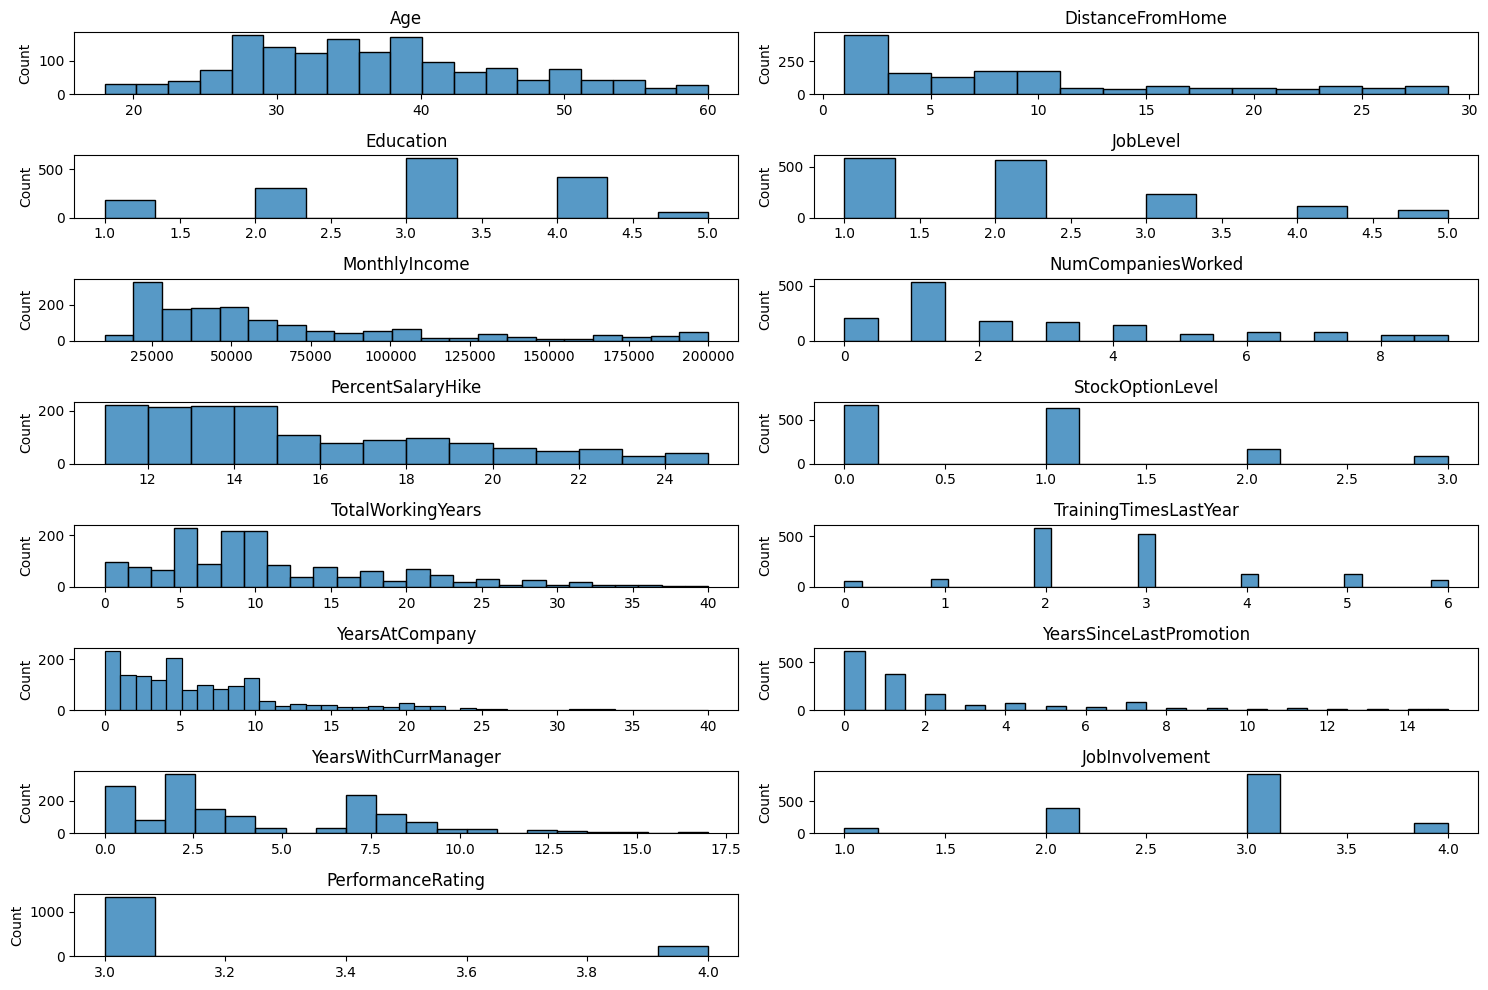

In [27]:
sp.plot_numericas(df_num)

- Cuando no tenemos continuidad, nos da idea de que una variable, aunque es numérica, se comporta como categórica. Por su comportamiento, gestionaremos ahora los tipos de variables:

| Variable                 | Tipo de Variable   |
|--------------------------|--------------------|
| Age                      | Numérica           |
| Attrition                | Categórica         |
| BusinessTravel           | Categórica         |
| Department               | Categórica         |
| DistanceFromHome         | Numérica           |
| Education                | Categórica           |
| EducationField           | Categórica         |
| Gender                   | Categórica         |
| JobLevel                 | Numérica           |
| JobRole                  | Categórica         |
| MaritalStatus            | Categórica         |
| MonthlyIncome            | Numérica           |
| NumCompaniesWorked       | Numérica           |
| PercentSalaryHike        | Numérica           |
| StockOptionLevel         | Categórica           |
| TotalWorkingYears        | Numérica           |
| TrainingTimesLastYear    | Categórica           |
| YearsAtCompany           | Numérica           |
| YearsSinceLastPromotion  | Numérica           |
| YearsWithCurrManager     | Numérica           |
| EnvironmentSatisfaction  | Categórica         |
| JobSatisfaction          | Categórica         |
| WorkLifeBalance          | Categórica         |
| JobInvolvement           | Categórica         |
| PerformanceRating        | Categórica         |

- Realizamos la conversión:

In [28]:
df[['Education', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']] = df[['Education', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']].astype(str)

- Vamos a analizar ahora las variables categóricas, separando nuevamente el DF según la nueva clasificiación.

In [29]:
df_num, df_cat = sp.separar_dataframe(df)

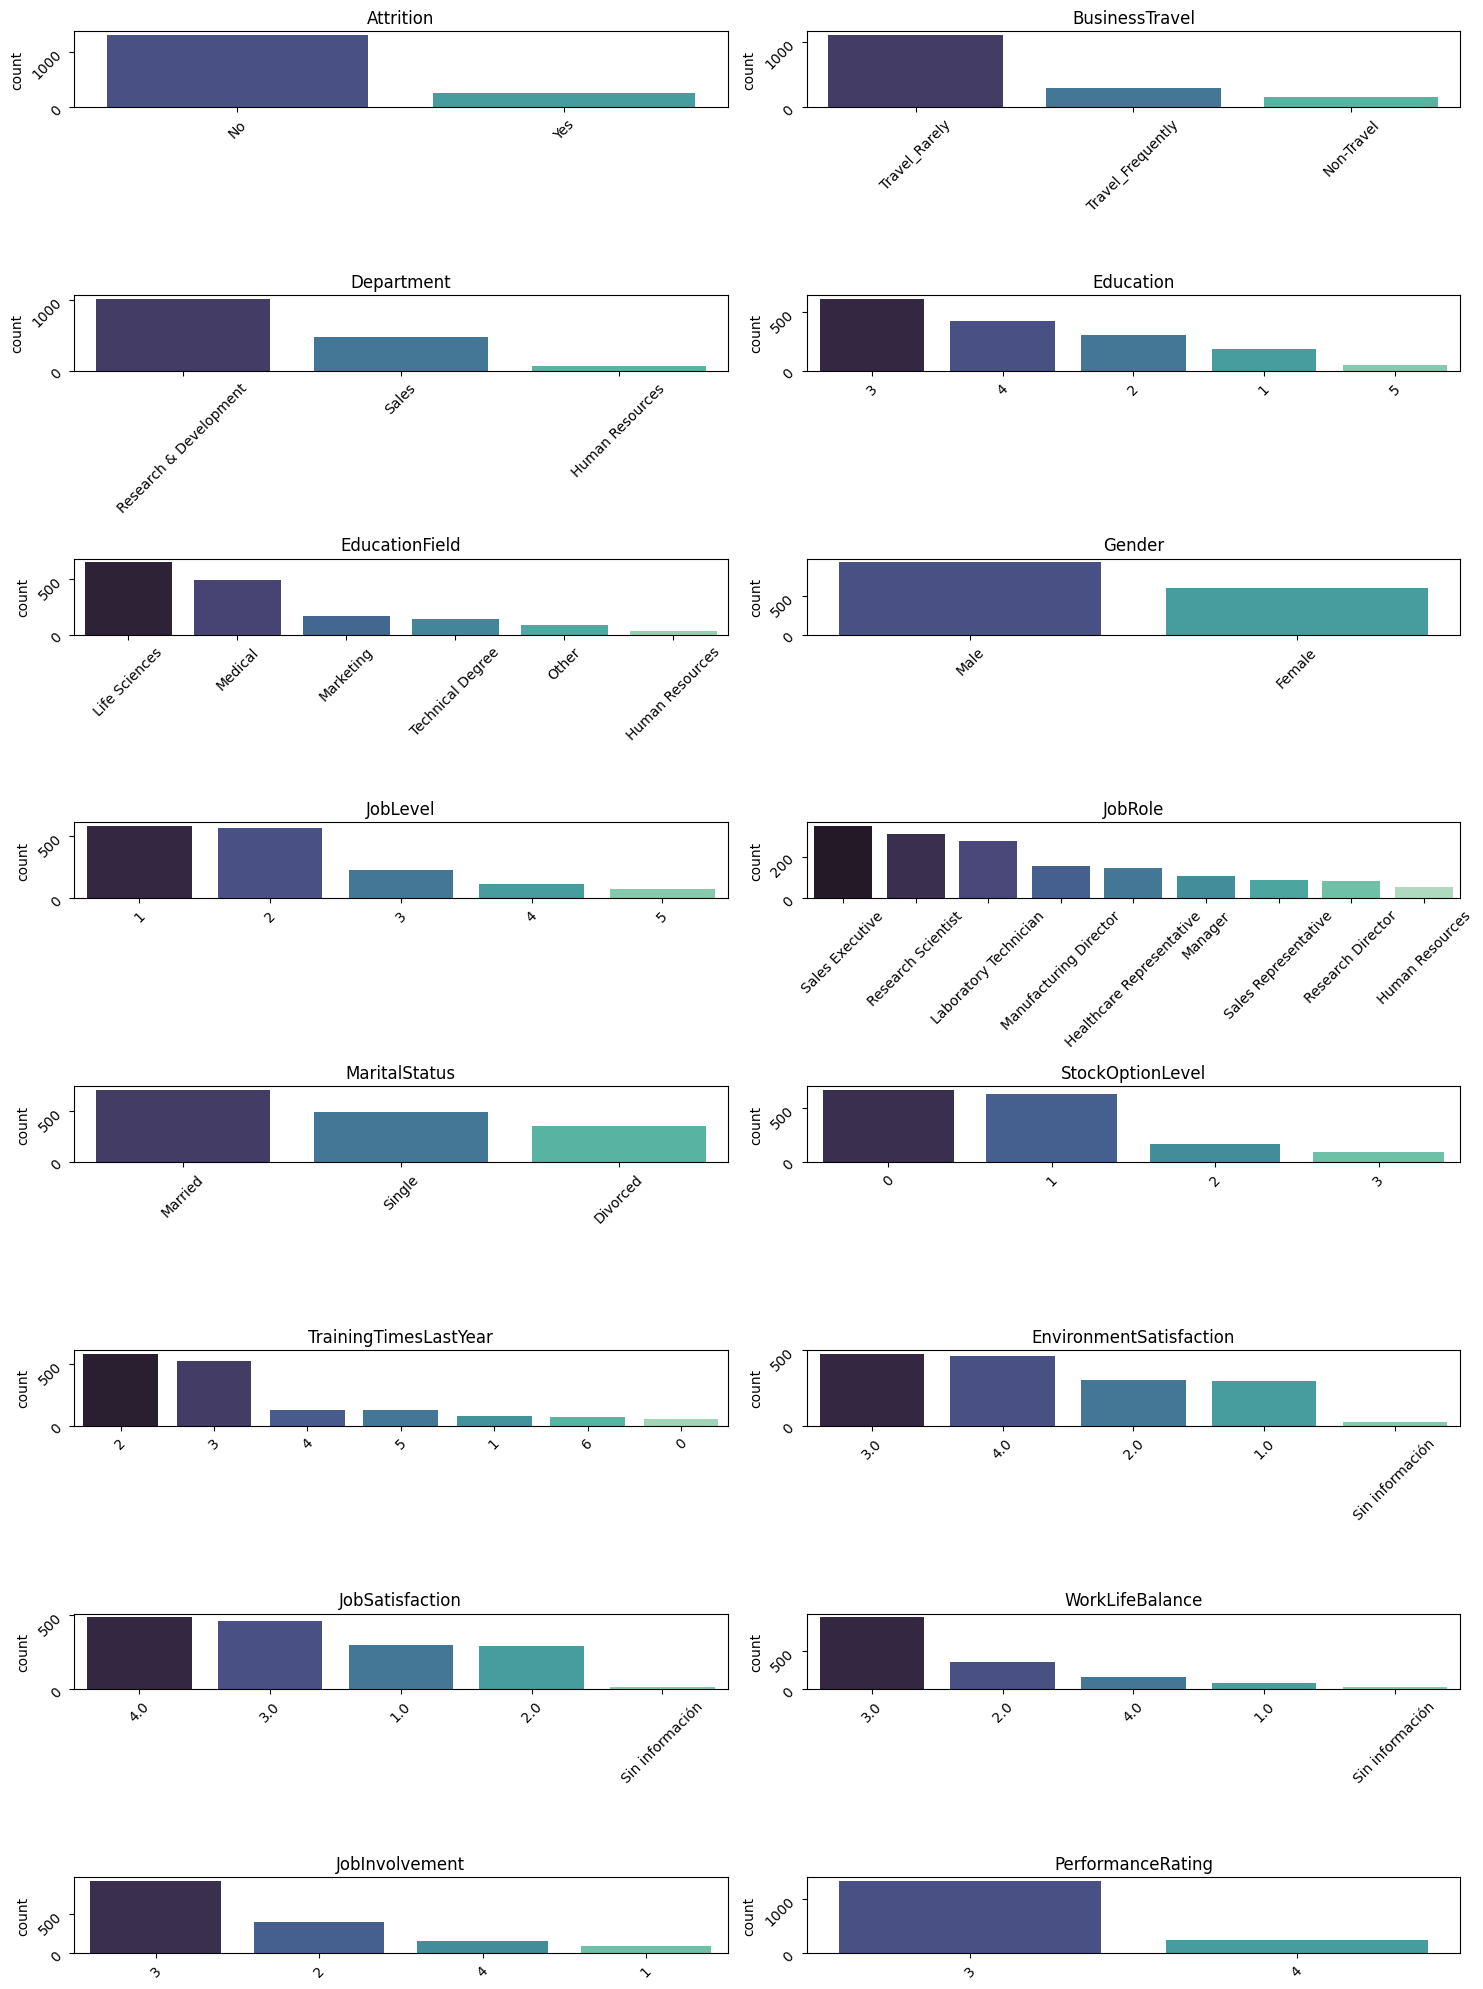

In [30]:
sp.plot_cat(df_cat, tamano_grafica=(15,20))

- Con las columnas ya convertidas, podemos ver que, las variables se encuentran en general repartidas entre categorías, estando algunas de las mayores diferencias en, como mencionamos anteriormente, la variable respuesta -"attrition"-, donde, con los no acaparando un 84% de los valores.

- Analizaremos ahora la relación numéricas-categóricas:

In [31]:
df_num

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,131160,1.0,11,1.0,1,0,0
1,31,10,41890,0.0,23,6.0,5,1,4
2,32,17,193280,1.0,15,5.0,5,0,3
3,38,2,83210,3.0,11,13.0,8,7,5
4,32,10,23420,4.0,12,9.0,6,0,4
...,...,...,...,...,...,...,...,...,...
4219,45,1,70830,2.0,12,25.0,1,0,0
4226,36,2,43200,2.0,17,5.0,1,0,0
4305,45,1,25800,8.0,17,20.0,17,0,15
4332,31,2,27280,8.0,11,7.0,4,0,2


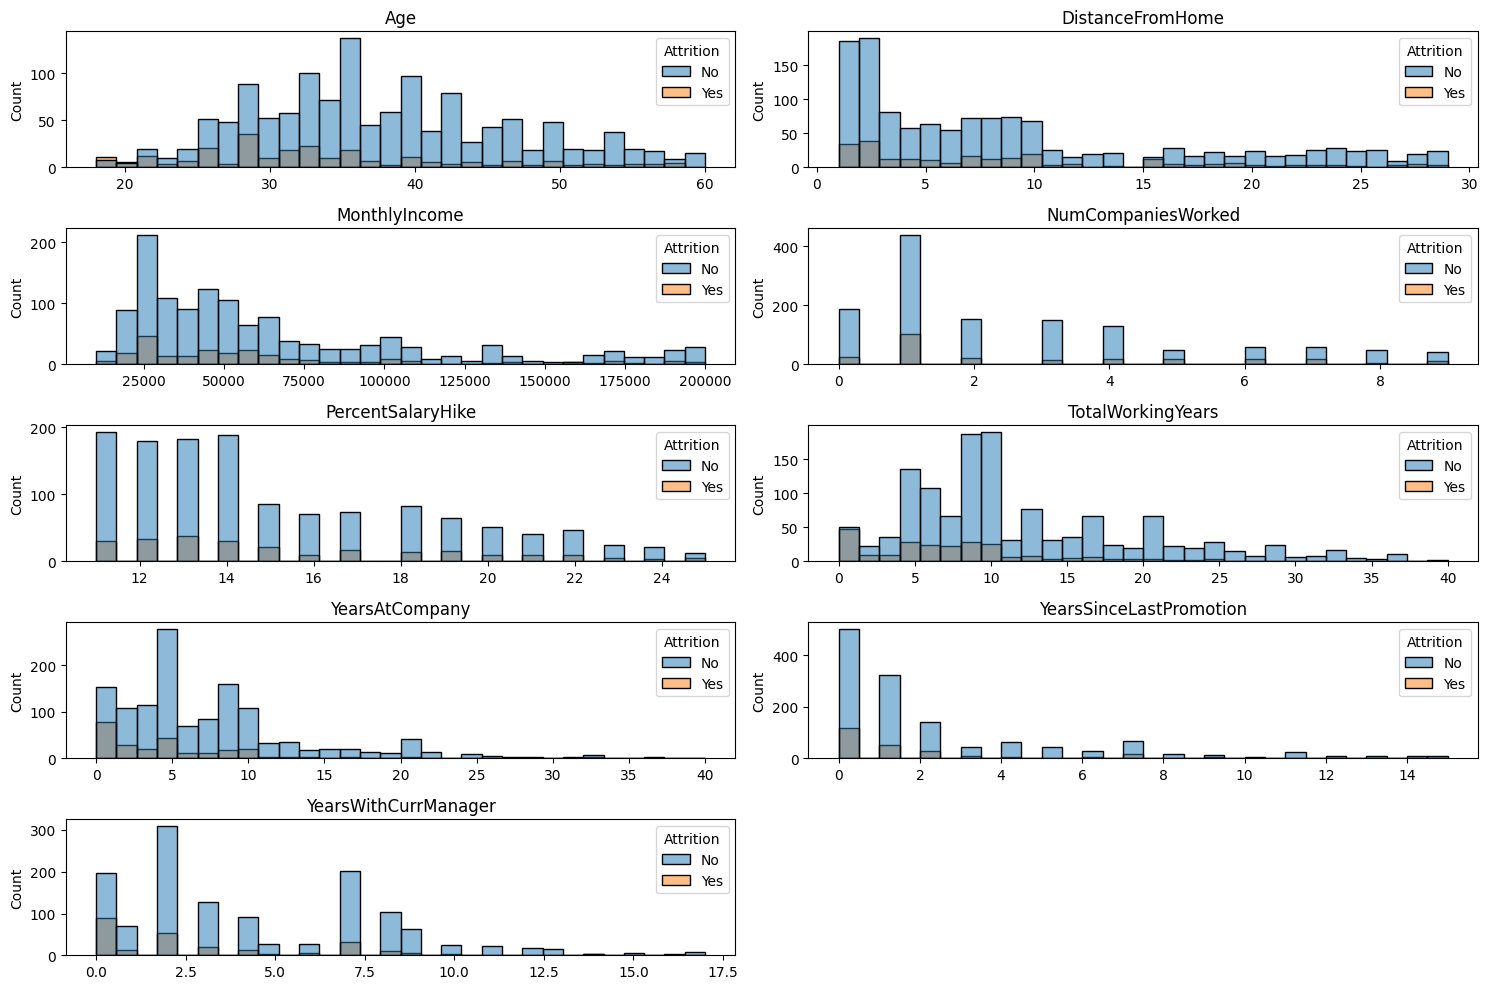

In [32]:
sp.relacion_var_numericas_problem_cat(df, "Attrition")

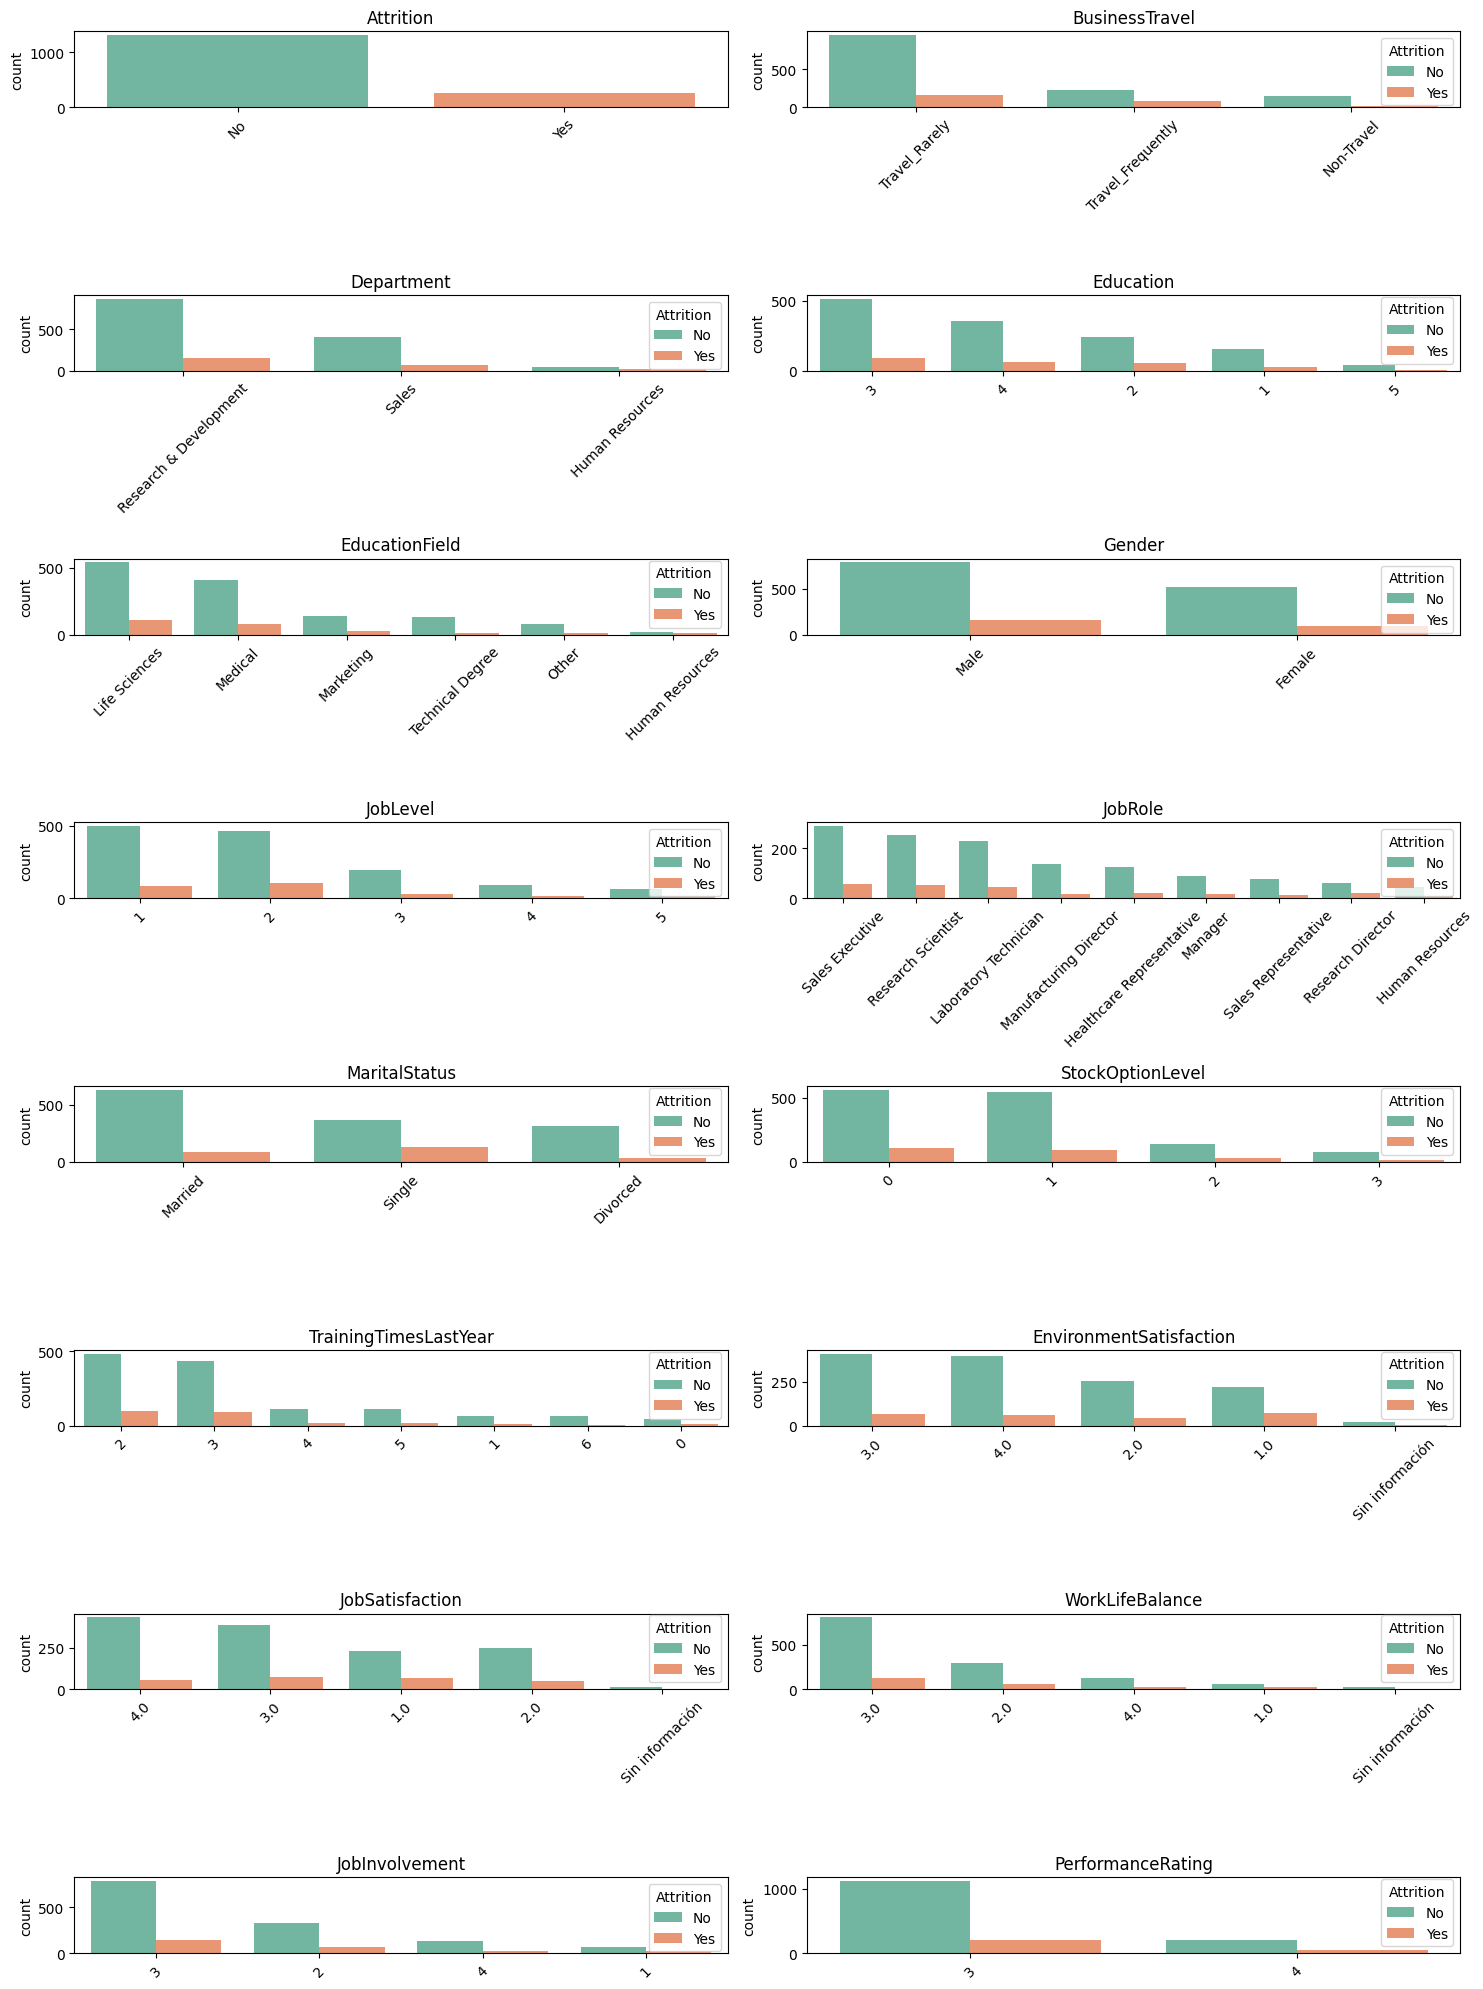

In [33]:
sp.relacion_var_categoricas_problem_cat(df, "Attrition")

- Analicemos ahora la matriz de correlación:

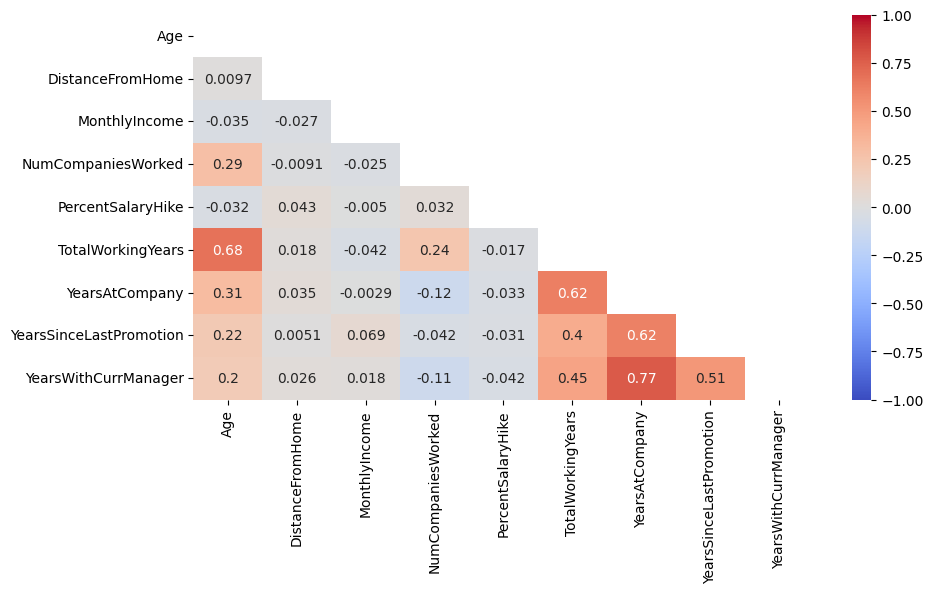

In [34]:
sp.matriz_correlacion(df)

- Identificamos una correlación alta cuando es mayor a 0.6. Las relaciones más fuertes las vemos entre variables como Age y Total Working Years, lo cual tiene sentido dado que, a mayor edad, más años totales de trabajo.

- En una gráfica de correlación, cuando hay dos variables con una relación muy fuerte, nos podemos plantear eliminar una de ellas, por aportar información redudante. En este caso, no tomaremos ninguna decisión inmediata.

- Revisaremos ahora los outliers. 

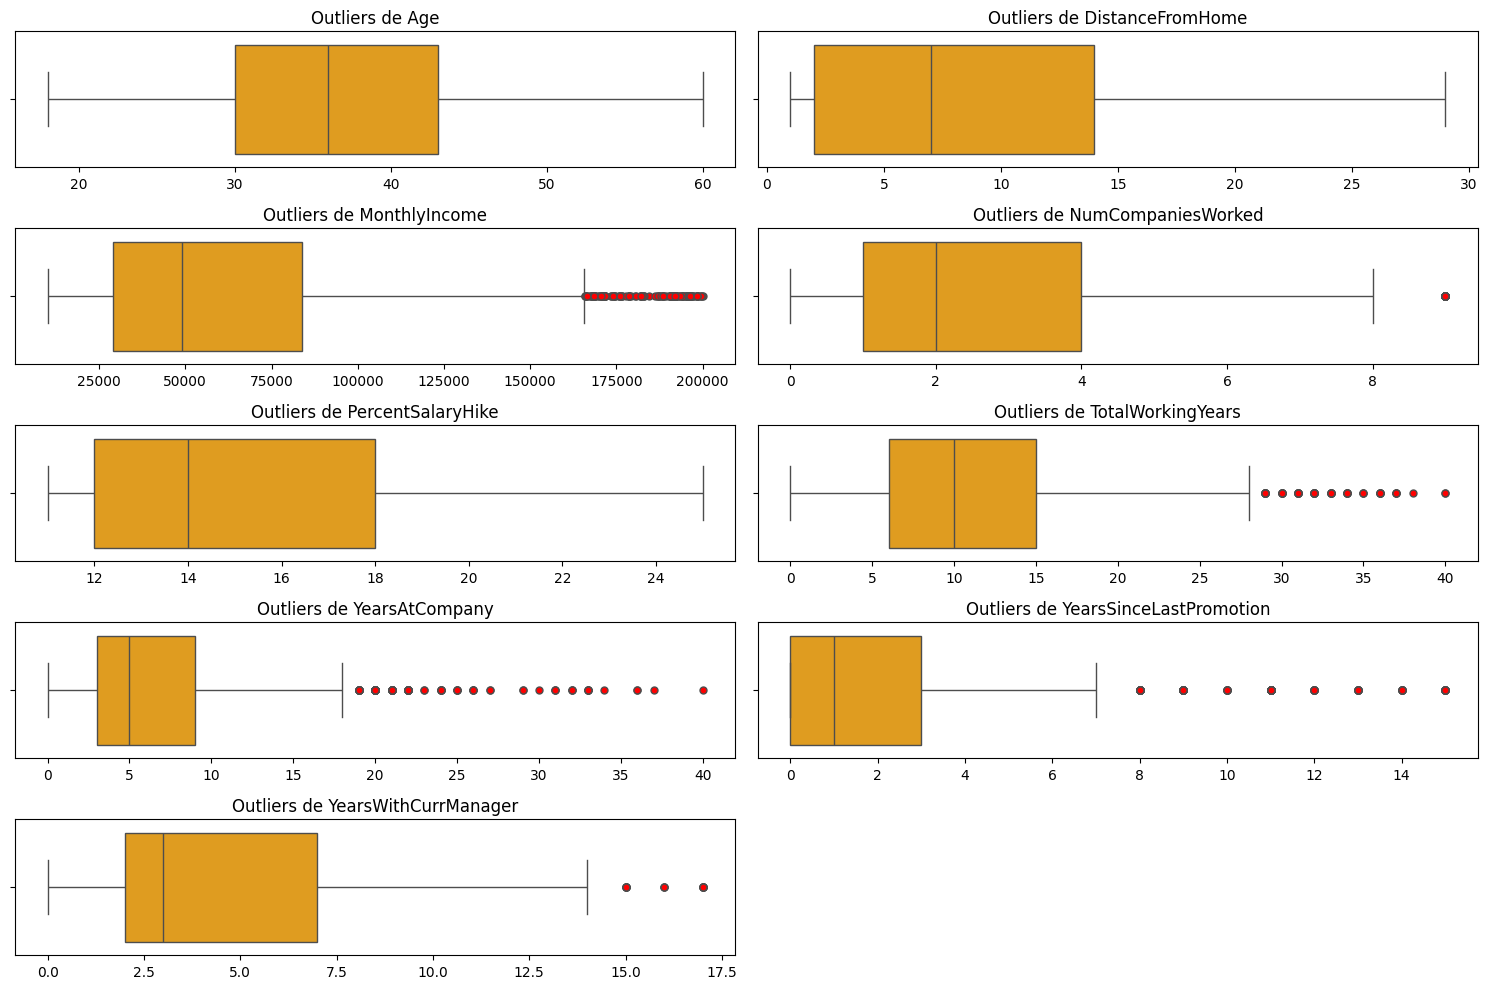

In [35]:
sp.detectar_outliers(df)

- En la gráfica somos capaces de identificar outliers en algunas de las variables numéricas. Para gestionarlos, utilizaremos más adelante el método IFO, dado que, tenemos pocos y claramente distintos del resto del datos.

- Finaliza el EDA guardando el DF sin outliers.

In [36]:
with open('../../datos/pickles_transformados/modelo5/df_sinnulos.pkl', 'wb') as f:
    pickle.dump(df, f)

In [37]:
df.select_dtypes(include=["category","object"]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating'],
      dtype='object')